# Самостоятельная работа (K-Means и EM-алгоритм: практика)

Большинство подростков активно общаются в социальных сетях. Многие из них также совершают покупки в интернете, что, естественно, вызывает интерес у рекламодателей. Маркетологи различных компаний стремятся выделять сегменты подростков с похожими интересами, чтобы давать более персонализированную рекламу и привлекать только тех подростков, которые могут стать их потенциальными клиентами. Например, магазину спортивной одежды интересно давать рекламу для девушек и юношей, которые относятся к сегменту интересующихся спортом.

В данном юните вы решите задачу сегментации подростков по их интересам. 

Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

*Признаки в данных*

* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

1. Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('data/snsdata.zip')
data = data.drop(['gender','gradyear','age','friends'], axis=1)
data.head()
data.shape
#(30000, 36)

(30000, 36)

2. Теперь нормализуйте данные с помощью `StandardScaler()`. Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке `(X_norm[0][0])`. Ответ округлите до двух знаков после точки-разделителя.

In [10]:
X_norm = StandardScaler().fit_transform(data)
X_norm[0][0].round(2)
#-0.33

-0.33

3. Реализуйте алгоритм `k-means` c девятью кластерами. В качестве значения параметра `random_state` возьмите число 42. Выведите получившееся значение инерции `(model.inertia_)`. Ответ округлите до двух знаков после точки-разделителя.

In [11]:
kmeans = KMeans(random_state=42,n_clusters=9)
kmeans.fit(X_norm)
round(kmeans.inertia_, 2)
#857169.1

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


857169.1

4. Сколько подростков относится к наиболее многочисленному кластеру? А сколько — к самому малочисленному?

In [12]:
X_predict = kmeans.predict(X_norm)
X_predict = pd.DataFrame(X_predict).value_counts()
X_predict
#Сколько подростков относится к наиболее многочисленному кластеру? - 19659
#А сколько — к самому малочисленному? - 1

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
dtype: int64

5. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: >

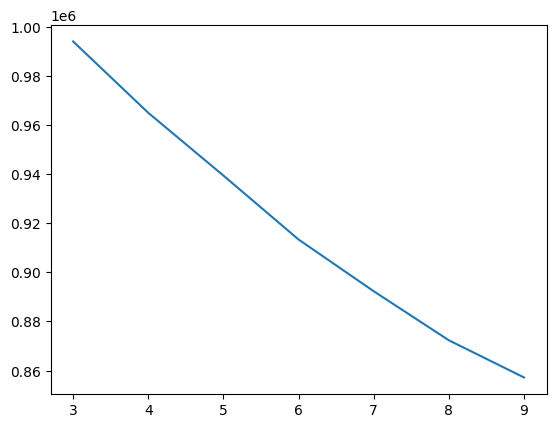

In [13]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

clusters = {}
for i in list(range(3,10)):
    clusters[i]=get_inertia(i, X_norm)
    
sns.lineplot(
    data=clusters,
    x=clusters.keys(),
    y=clusters.values()
)
#9 кластеров

Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: >

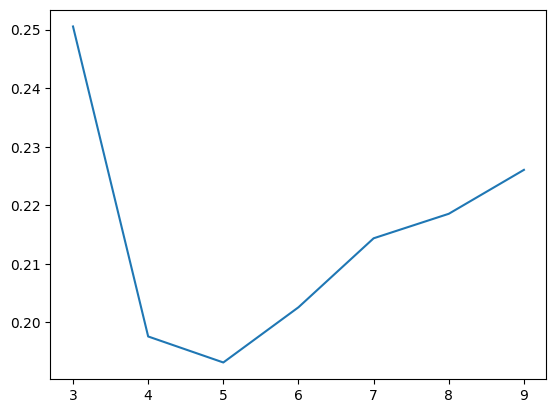

In [7]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = {}
for clust_num in list(range(3,10)):
    silhouette[clust_num] = get_silhouette(clust_num, X_norm)
    
sns.lineplot(
    data=silhouette,
    x=silhouette.keys(),
    y=silhouette.values()
)
#3 кластера

6. Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [14]:
k_means =  KMeans(n_clusters=3, random_state=42)
k_means.fit(X_norm)
X_predict = k_means.predict(X_norm)

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
X_predict = pd.DataFrame(X_predict, columns=['cluster'])
X_result = pd.concat([data, X_predict], axis=1)
X_result = X_result.groupby(by='cluster').mean()
X_result = X_result.T

X_result0 = X_result[0].sort_values(ascending=False).head(10)
X_result1 = X_result[1].sort_values(ascending=False).head(10)
X_result2 = X_result[2].sort_values(ascending=False).head(10)

#пересечение индексов
X_result0.index.intersection(X_result1.index).intersection(X_result2.index)
#Index(['music', 'dance', 'god', 'hair']

Index(['music', 'dance', 'god', 'hair'], dtype='object')

7. Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.
Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [16]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_norm)
X_predict_gm = gm.predict(X_norm)
X_predict_gm_vc = pd.DataFrame(X_predict_gm).value_counts()
X_predict_gm_vc
#23426

0    23426
1     6573
2        1
dtype: int64

8. В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка

In [17]:
X_result = pd.DataFrame(X_norm, columns=data.columns)
X_predict_gm = pd.DataFrame(X_predict_gm, columns=['cluster'])
X_result_gm = pd.concat([X_result, X_predict_gm], axis=1)
X_result_gm[X_result_gm['cluster']==2].T.sort_values(by=list(X_result_gm[X_result_gm['cluster']==2].T.columns),ascending=False).head()

,14187
blonde,168.307291
sex,19.395543
drunk,14.812744
death,13.475099
hair,10.544693


# Самостоятельная работа (Итоговая практика по алгоритмам кластеризации)

В нашем распоряжении есть данные о 8950 держателях кредитных карт одного из банков Нью-Йорка. Банк собрал достаточно много данных об этих людях и о том, как они пользовались кредитными картами за последние полгода.

Маркетологи хотят запустить рекламную кампанию, однако для этого необходимо произвести сегментацию клиентов, чтобы сделать акционное предложение более персонализированным. Мы попробуем использовать все известные нам методы кластеризации и посмотрим на получившиеся результаты.

**Признаки**

* CUST_ID — идентификационный номер держателя карты;
* BALANCE — баланс, доступный для совершения покупок;
* BALANCEFREQUENCY — как часто обновляется показатель баланса (1 — часто, 0 — нечасто);
* PURCHASES — количество покупок, оплаченных со счёта;
* ONEOFFPURCHASES — максимальная сумма единовременной покупки;
* INSTALLMENTSPURCHASES — сумма покупок, сделанных в рассрочку;
* PURCHASESFREQUENCY — как часто в целом совершаются покупки (1 — часто, 0 — нечасто);
* ONEOFFPURCHASESFREQUENCY — частота совершения единовременных покупок (1 — часто, 0 — нечасто);
* PURCHASESINSTALLMENTSFREQUENCY — частота совершения покупок в рассрочку (1 — часто, 0 — нечасто);
* CASHADVANCEFREQUENCY — частота внесения авансовых платежей;
* CASHADVANCETRX — количество транзакций с авансовыми взносами;
* PURCHASESTRX — количество совершённых транзакций с покупками;
* CREDITLIMIT — кредитный лимит держателя карты;
* PAYMENTS — сумма платежей пользователя;
* MINIMUM_PAYMENTS — сумма минимального платежа пользователя;
* PRCFULLPAYMENT — выплаченный процент от полного платежа;
* TENURE — срок обслуживания кредитной карты.

1. Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [18]:
data = pd.read_csv('data/CC_GENERAL.zip')
sum(data.isnull().mean()*data.shape[0])
#314

314.0

In [19]:
#пропуски есть только в двух столбцах
data.isnull().mean()[data.isnull().mean()>0]

CREDIT_LIMIT        0.000112
MINIMUM_PAYMENTS    0.034972
dtype: float64

2. Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака `MINIMUM_PAYMENTS` (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [20]:
values = {
    'CREDIT_LIMIT': data['CREDIT_LIMIT'].mean(),
    'MINIMUM_PAYMENTS': data['MINIMUM_PAYMENTS'].mean()
}

data = data.fillna(values)

data['MINIMUM_PAYMENTS'].mean().round(2)
#864.21

864.21

3. Теперь нормализуйте данные с помощью `StandardScaler()`. Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке `(X_norm[0][0])`. Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак `CUST_ID` — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [21]:
data = data.drop(['CUST_ID'], axis=1)
X_norm = StandardScaler().fit_transform(data)
X_norm[0][0].round(2)
#-0.73

-0.73

4. Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — `k-means`. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра `random_state` возьмём значение 42.

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

<AxesSubplot: >

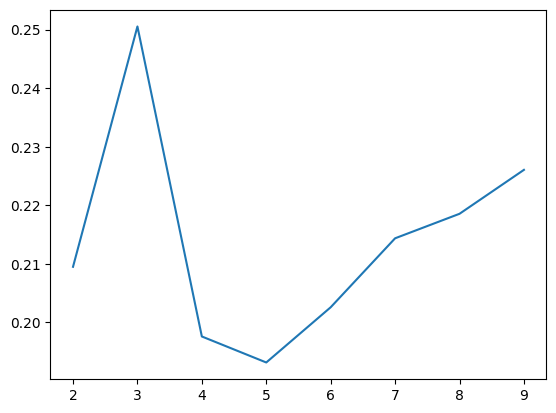

In [22]:
silhouette = {}
for clust_num in list(range(2,10)):
    silhouette[clust_num] = get_silhouette(clust_num, X_norm)
    
sns.lineplot(
    data=silhouette,
    x=silhouette.keys(),
    y=silhouette.values()
)
#3 кластера

5. Теперь реализуем непосредственно кластеризацию `k-means` с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [23]:
kmeans = KMeans(random_state = 42, n_clusters=3)
kmeans.fit(X_norm)
X_predict = kmeans.predict(X_norm)
X_predict = pd.DataFrame(X_predict).value_counts(ascending=True)
X_predict.iloc[0]
#1235

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1235

6. Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [24]:
db = DBSCAN()
X_predict_db = db.fit(X_norm)
X_predict_db.labels_
res = pd.DataFrame(X_predict_db.labels_)
res = pd.DataFrame(res.value_counts())
res.head()
res.shape[0]-1 #убираем 1 кластер ("-1"), там шумовые точки)
#38

38

7. В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма `DBSCAN`, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр `eps` по значениям, заданным как `np.arange(0.1,3,0.2)`, а параметр `min_samples` — по значениям, заданным как `range(1,20,4)`. Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [25]:
eps =  np.arange(0.1,3,0.2)
min_samples = np.arange(1,20,4)

result_df = pd.DataFrame(columns=min_samples, index=eps)

for i in eps:
    for j in min_samples:
        result_df[j][i] = silhouette_score(X_norm, DBSCAN(eps=i,min_samples=j).fit(X_norm).labels_)

result_df

,1,5,9,13,17
0.1,0.016088,-0.374808,-0.253565,-0.243615,-0.250181
0.3,0.022679,-0.424475,-0.404209,-0.351984,-0.352596
0.5,-0.145012,-0.443701,-0.317657,-0.133802,-0.186477
0.7,-0.261276,-0.438837,-0.326002,-0.27049,-0.266471
0.9,-0.363359,-0.359175,-0.081096,0.063436,-0.040918
1.1,-0.396628,-0.179942,-0.121349,0.114812,-0.033859
1.3,-0.399305,-0.019937,0.172021,0.1328,0.252843
1.5,-0.360118,0.000611,0.340178,0.325028,0.314604
1.7,-0.303493,0.398901,0.338323,0.383677,0.372052
1.9,-0.249307,0.461593,0.442959,0.429943,0.421012


<class 'pandas.core.frame.DataFrame'>
Float64Index: 15 entries, 0.1 to 2.900000000000001
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       15 non-null     float64
 1   5       15 non-null     float64
 2   9       15 non-null     float64
 3   13      15 non-null     float64
 4   17      15 non-null     float64
dtypes: float64(5)
memory usage: 1.2 KB


<AxesSubplot: >

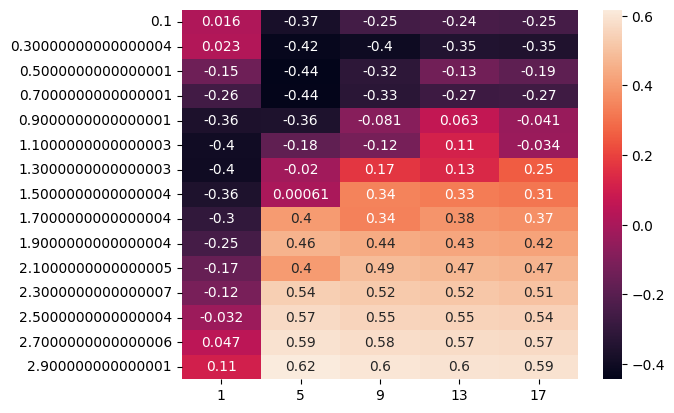

In [26]:
result_df1 = result_df.astype('float')
result_df1.info()
sns.heatmap(result_df1, annot=True)
#оптимальный вариант - eps - 2.9, min_samples - 5, коэффициент силуэта - 0.62

8. Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

<AxesSubplot: >

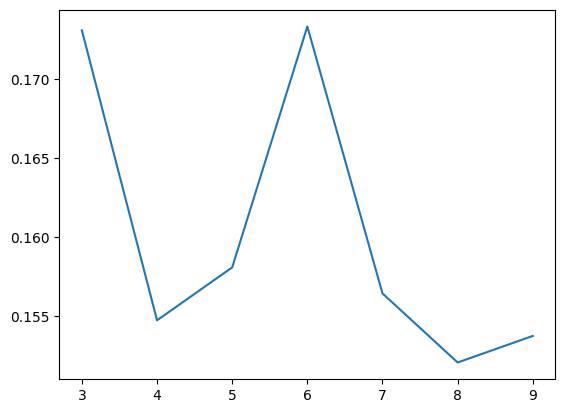

In [28]:
silhouette = {}
for clust_num in list(range(3,10)):
    silhouette[clust_num] = silhouette_score(X_norm, AgglomerativeClustering(n_clusters=clust_num).fit(X_norm).labels_)
    
sns.lineplot(
    data=silhouette,
    x=silhouette.keys(),
    y=silhouette.values()
)
# 6 кластерв

9. Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [31]:
agcl_labels = AgglomerativeClustering(n_clusters=6).fit(X_norm).labels_
agcl_labels = pd.DataFrame(agcl_labels).value_counts(ascending=False)
agcl_labels[0]
#3946

3946

Давайте визуализируем результаты кластеризации `k-means`, отобразив два признака — количество покупок и кредитный лимит:

c:\Users\пользователь\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


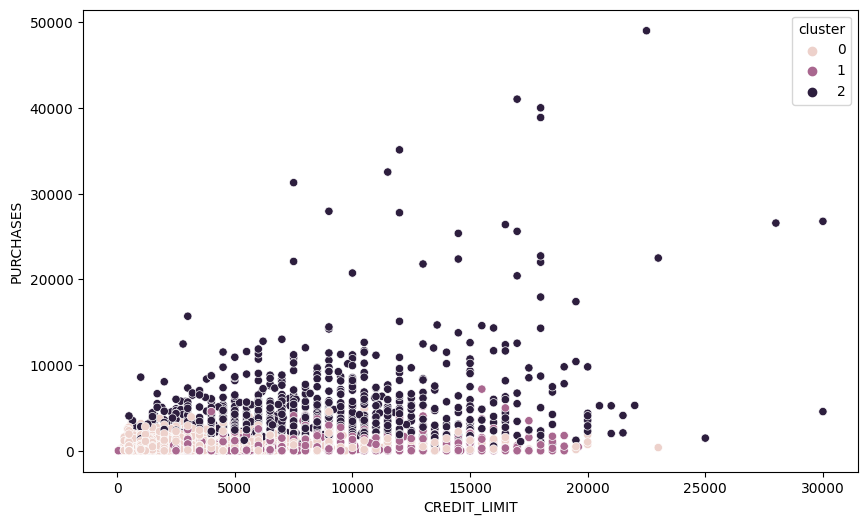

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df = data
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()

Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.

Такая проблема с выделением кластеров часто возникает с данными, в которых много признаков. Для того чтобы её решить, можно, например, применять снижение размерности — в следующем модуле мы как раз поработаем с соответствующими методами и научимся преодолевать такие ситуации.